### SSH data from redmar-CICESE stations 

http://redmar.cicese.mx

Useful stations are:

|Code|Station|Lat|Lon|
|:--:|:--:|:--:|:-:|
|ENSM|Ensenada| 31°50.894'N | 116°37.067'W|
|SNQN|San Quintín|30°29'4.23"N | 115°58'38.95"W|
|ICDN|Isla de Cedros|28°5.760'N|115°10.992'W|
|GROM|Guerrero Negro|27° 53' N |114° 09' W|
|LPAZ|La Paz|24° 10' N|110° 21' W|

![](figures/estaciones_redmar.png)

### Metadata

Centro de Investigacion Cientifica y de Educacion Superior de Ensenada
   
                  Laboaratorio del Nivel del Mar
                    Red Mareografica de CICESE
   
                       FORMATO DE DATOS
        Estaciones Mareograficas Meteorologicas Costeras (EMMC)
   
                       Zona de tiempo: GMT

|Col|  Variable          |       Unidades | Equipo|
|:--:|:--:|:--:|:--:|
|1  |  Anio   |                   -||
|2  |  Mes    |                  -||
|3  |  Dia    |                  -||
|4  |  Hora   |                  -||
|5  |  Minuto |                  -||
|6  |  Segundo |                 -||
|7  |  ID Estacion |             -||
|8  |  Voltaje sistema   |       V |         datalogger+sensores+radios|
|9  |  Nivel del mar |           m  |        sensor de presion sumergido Leveltrol 700|
|10 |  Nivel del mar |           m  |        sensor de presion burbujeador OTT-CBS|
|11 |  Switch1   |               -  |        switch de flotador superior|
|12 |  Switch2   |               -  |        switch de flotador inferior|
|13 |  Temperatura Agua  |       grados(C)|  sensor de temperatura 109SS-L|
|14 |  Nivel del mar   |         m        |  radar OTT-RSL|
|15 |  Radiacion Solar |         W/m^2    |  piranometro SP-212 ( no funcionando actualmente)|
|16 |  Direccion Viento |        Azimut   |  Vaisala WXT520|
|17 |  Magnitud Viento |         m/s      |  Vaisala WXT520|
|18 |  Temperatura Aire |        grados(C)|  Vaisala WXT520|
|19 |  Humedad Relativa  |       %        | Vaisala WXT520|
|20 |  Presion Atmosferica |     mb      |   Vaisala WXT520|
|21 |  Precipitacion  |          mm      |   Vaisala WXT520|
|22 |  Voltaje estac. meteor. |  V       |   Vaisala WXT520|
|23 |  Nivel del Mar       |     m       |   radar Sutron R|

Nota: Texto escrito sin acentos


<<Reactivacion del Sensor de Temperatura del Mar el día 3/Dic/2018>>

In [36]:
import cmocean as cmo
import datetime as dt
from matplotlib.dates import date2num
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import ssh_tools as ssht # my module
from scipy import signal


In [34]:
def stick_plot(time, u, v, **kw):
    '''Function by Filipe Fernandes: https://ocefpaf.github.io/python4oceanographers/blog/2014/09/15/stick_plot/'''
    width = kw.pop('width', 0.002)
    headwidth = kw.pop('headwidth', 0)
    headlength = kw.pop('headlength', 0)
    headaxislength = kw.pop('headaxislength', 0)
    angles = kw.pop('angles', 'uv')
    ax = kw.pop('ax', None)
    
    if angles != 'uv':
        raise AssertionError("Stickplot angles must be 'uv' so that"
                             "if *U*==*V* the angle of the arrow on"
                             "the plot is 45 degrees CCW from the *x*-axis.")

    time, u, v = map(np.asanyarray, (time, u, v))
    if not ax:
        fig, ax = plt.subplots()
    
    q = ax.quiver(date2num(time), [[0]*len(time)], u, v,
                  angles='uv', width=width, headwidth=headwidth,
                  headlength=headlength, headaxislength=headaxislength,
                  **kw)

    ax.axes.get_yaxis().set_visible(False)
    ax.xaxis_date()
    return q

In [2]:
col_names = ['year','month', 'day', 'hour','minute','second','ID',
                'voltage','ssh_leveltrol','ssh_burbujeador',
                'switch1','switch2', 'water_temp','ssh_radar',
                'solar_radiation','wind_dir','wind_speed',
                'air_temp','rel_humidity','atm_pressure', 'precipitation', 
                'voltage_station', 'ssh_radar_sutron']


### Identify periods where we have wind dir and wind speed data for both GROM and ICDN

2015
2016
2017
2018
2019
2020


/Users/Karina/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


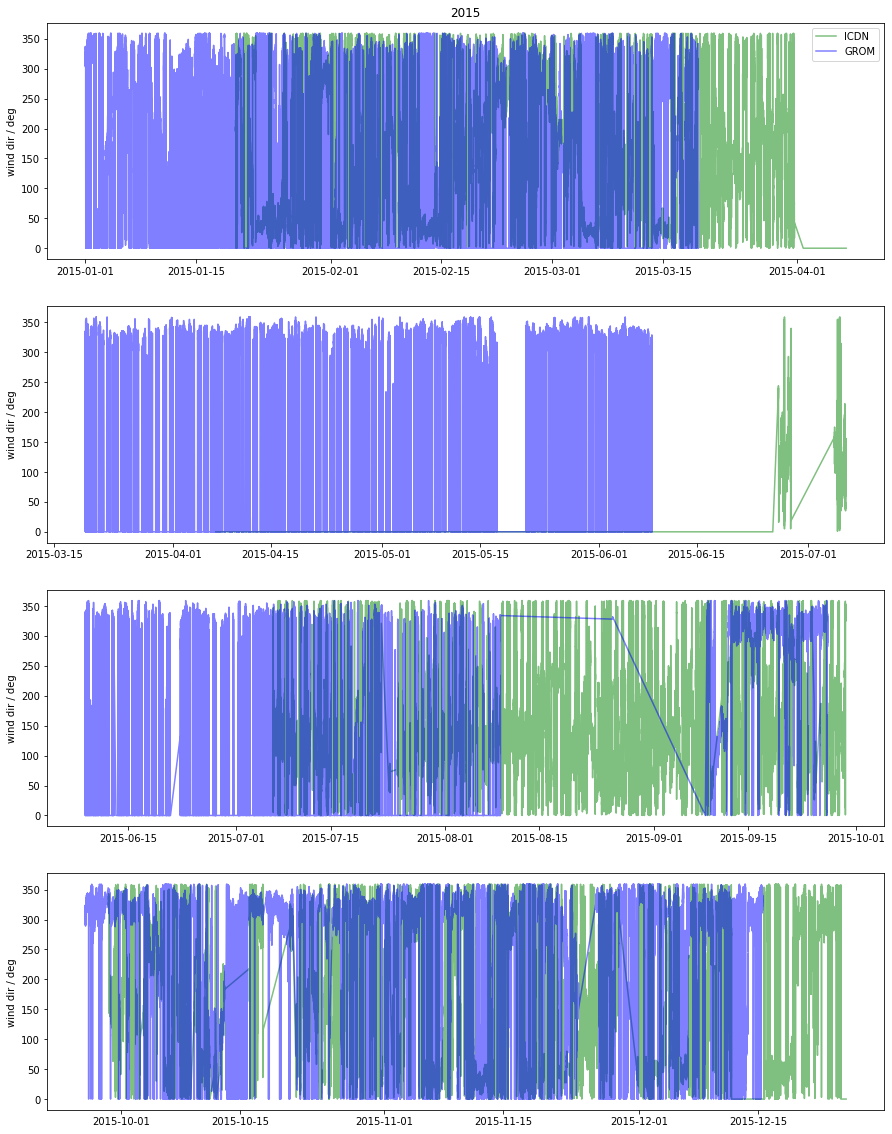

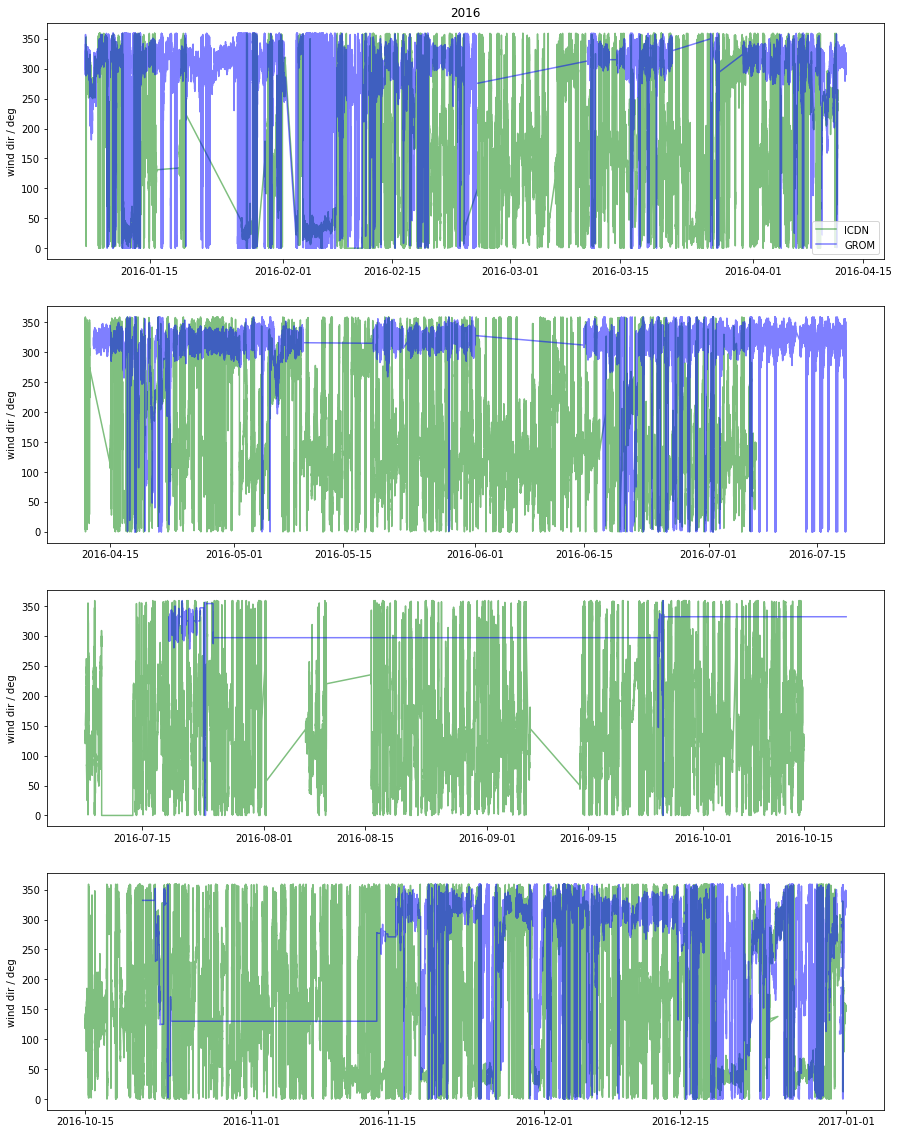

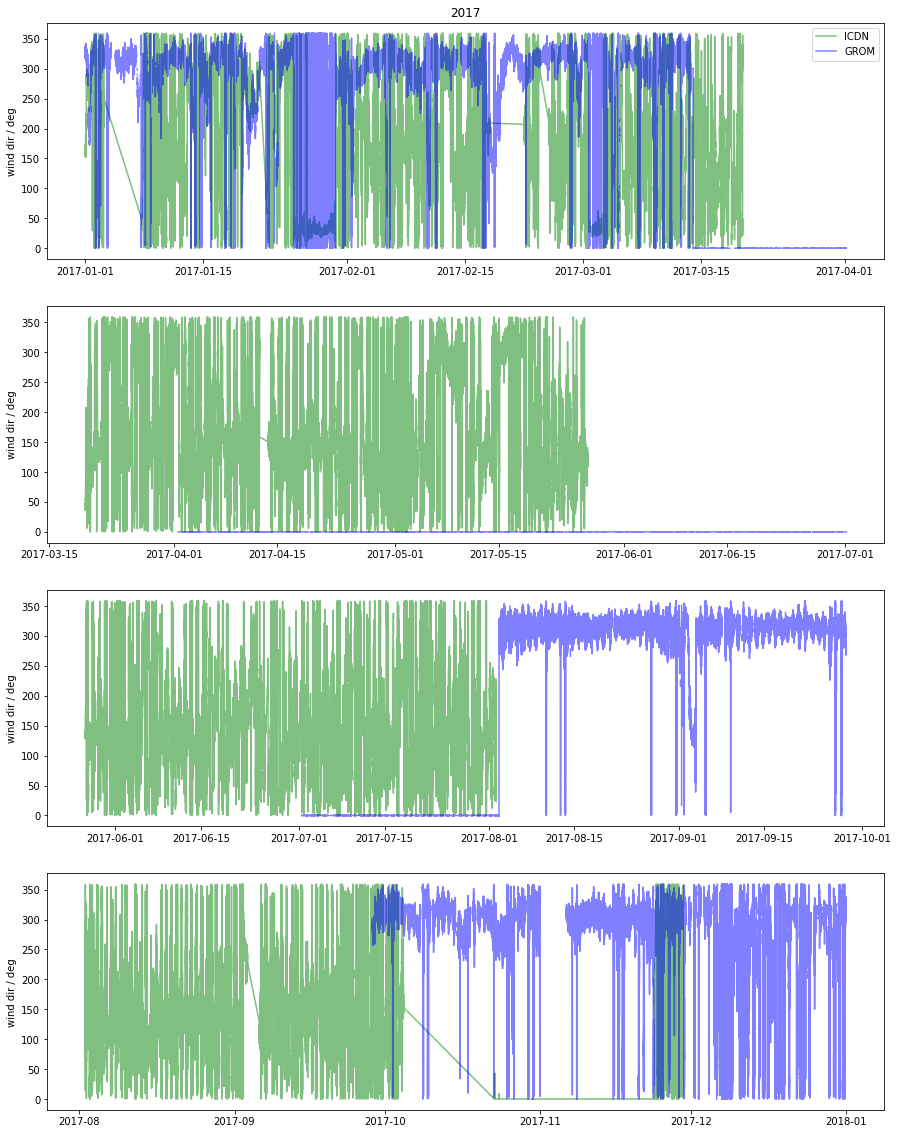

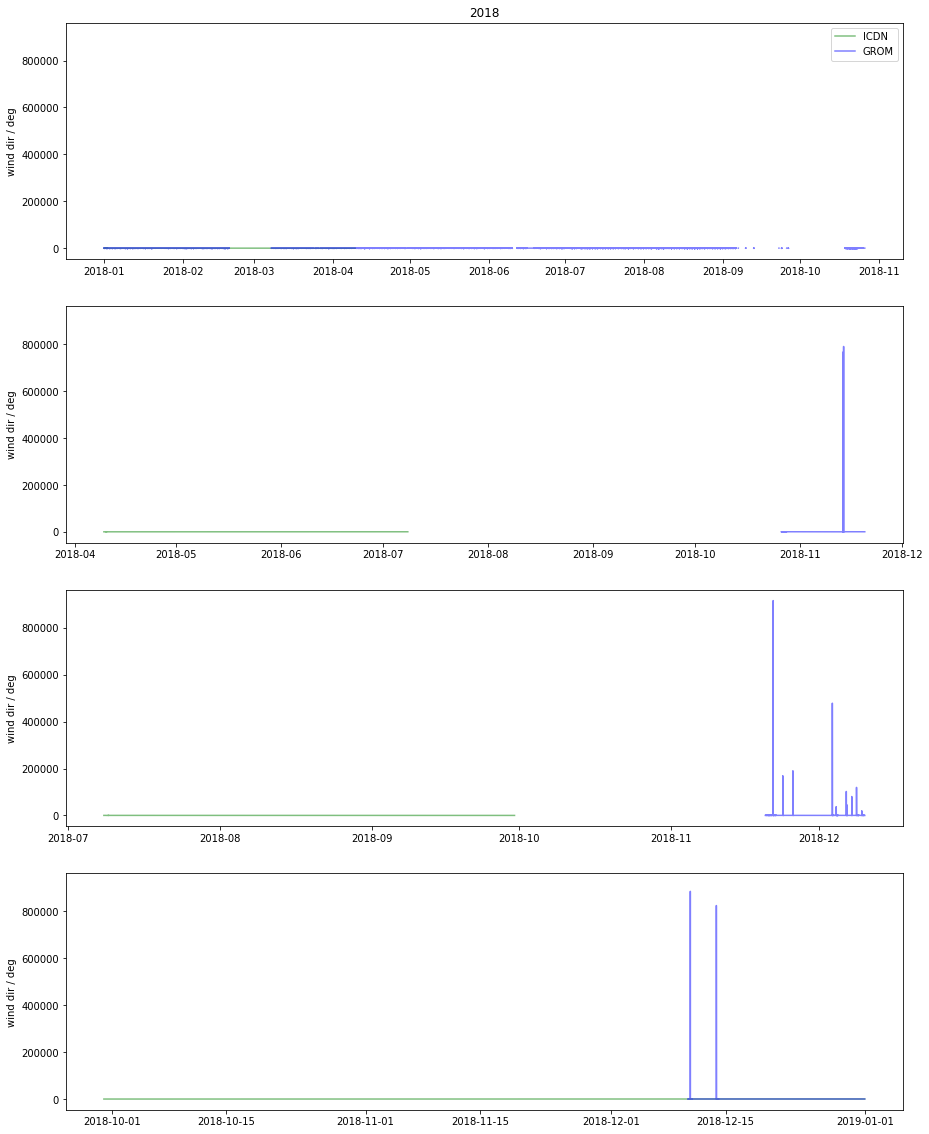

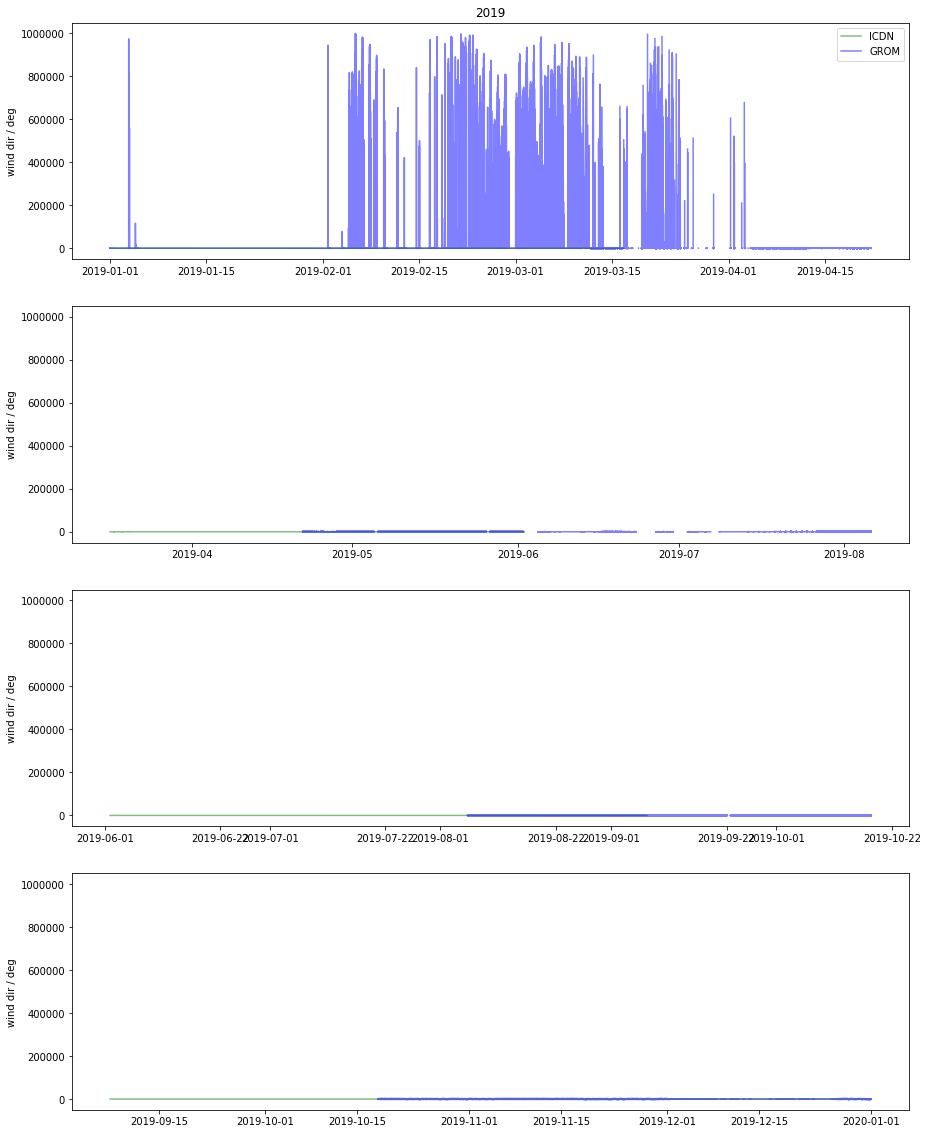

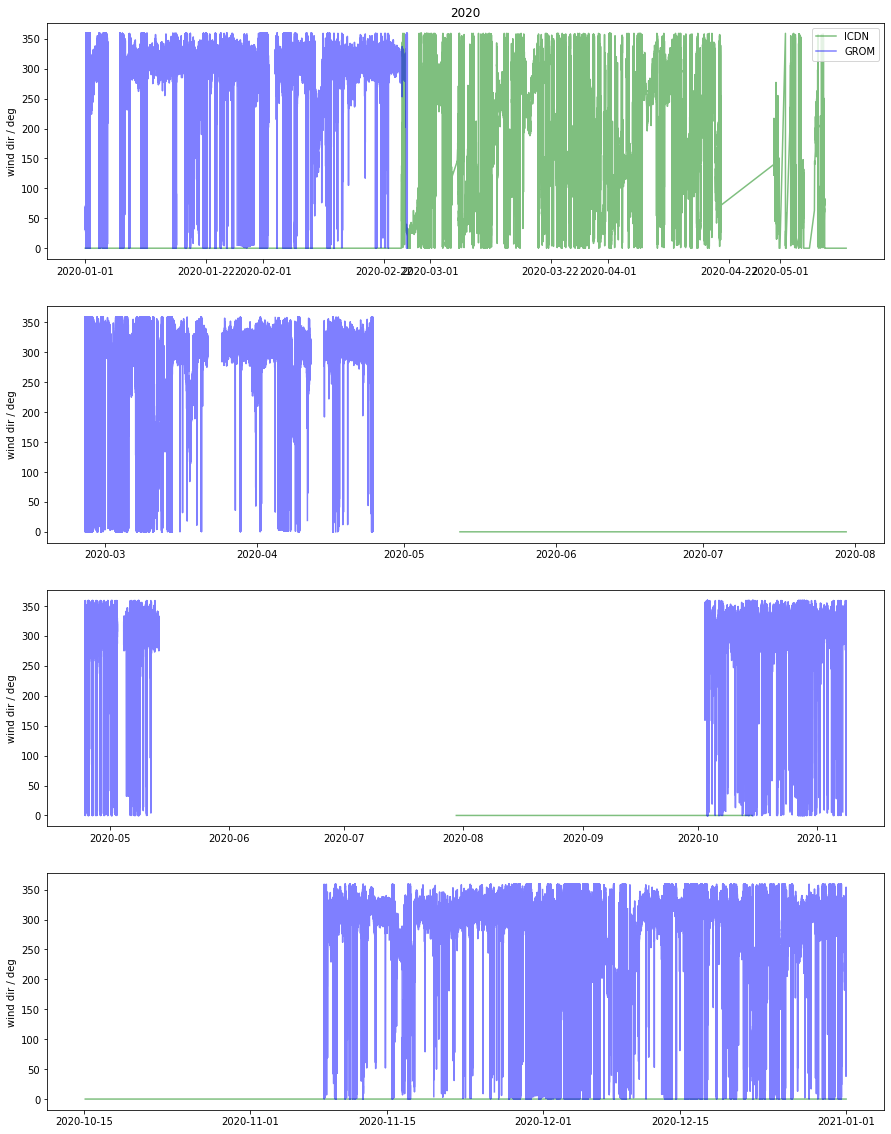

In [55]:
years = ['2015','2016','2017','2018','2019','2020']
stations = ['ICDN', 'GROM']
colors = ['green','blue']
for year in years:
    ii = 0
    fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(15,20), sharey=True)

    for station, col in zip(stations, colors):
        directory = '../REDMAR/'+station+'/'+year+'/'
        offset = 0
        df = pd.DataFrame(columns = col_names)   
        for file in sorted([fname for fname in os.listdir(directory) if fname.endswith('.dat')]):
            filename = directory+file
            df_new = ssht.get_redmar_dataframe(filename, na_val=999)  
            df = df.append(df_new)
            continue
        #downsample to 1H 
        #df1 = df['wind_dir'].resample('1H').mean() 
        df1 = df['wind_dir']
        npts = int(len(df1.index)/4)
        ax1.plot(df1.index[:npts], df1[:npts]+offset, color=col, alpha=0.5,label=station)
        ax2.plot(df1.index[npts:2*npts], df1[npts:2*npts]+offset, color=col, alpha=0.5,)
        ax3.plot(df1.index[2*npts:3*npts], df1[2*npts:3*npts]+offset, color=col, alpha=0.5,)
        ax4.plot(df1.index[3*npts:4*npts], df1[3*npts:4*npts]+offset, color=col, alpha=0.5,)

        ii=ii+1

    for ax in [ax1,ax2,ax3,ax4]:
        ax.set_xlabel('')
        ax.set_ylabel('wind dir / deg')
    ax1.legend()
    ax1.set_title(year)
    plt.show()
    print(year)

2015
2016
2017
2018
2019
2020


/Users/Karina/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


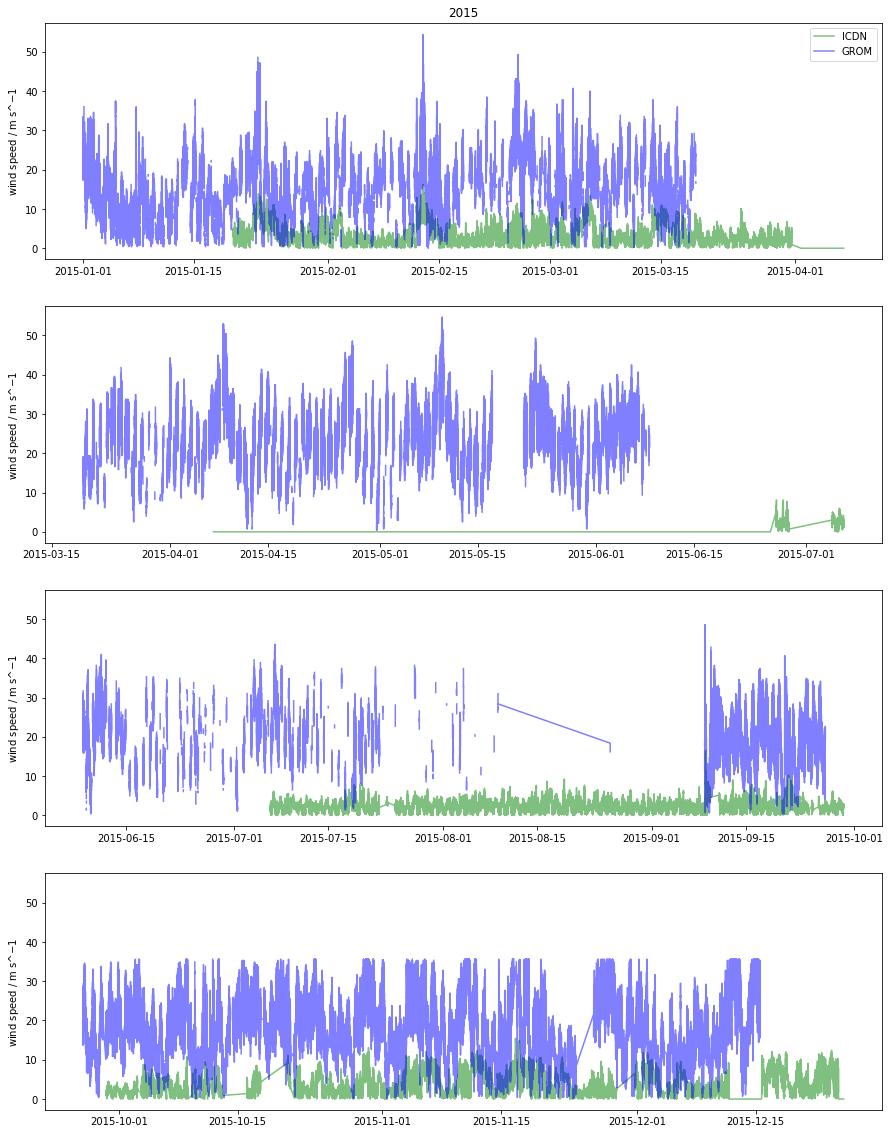

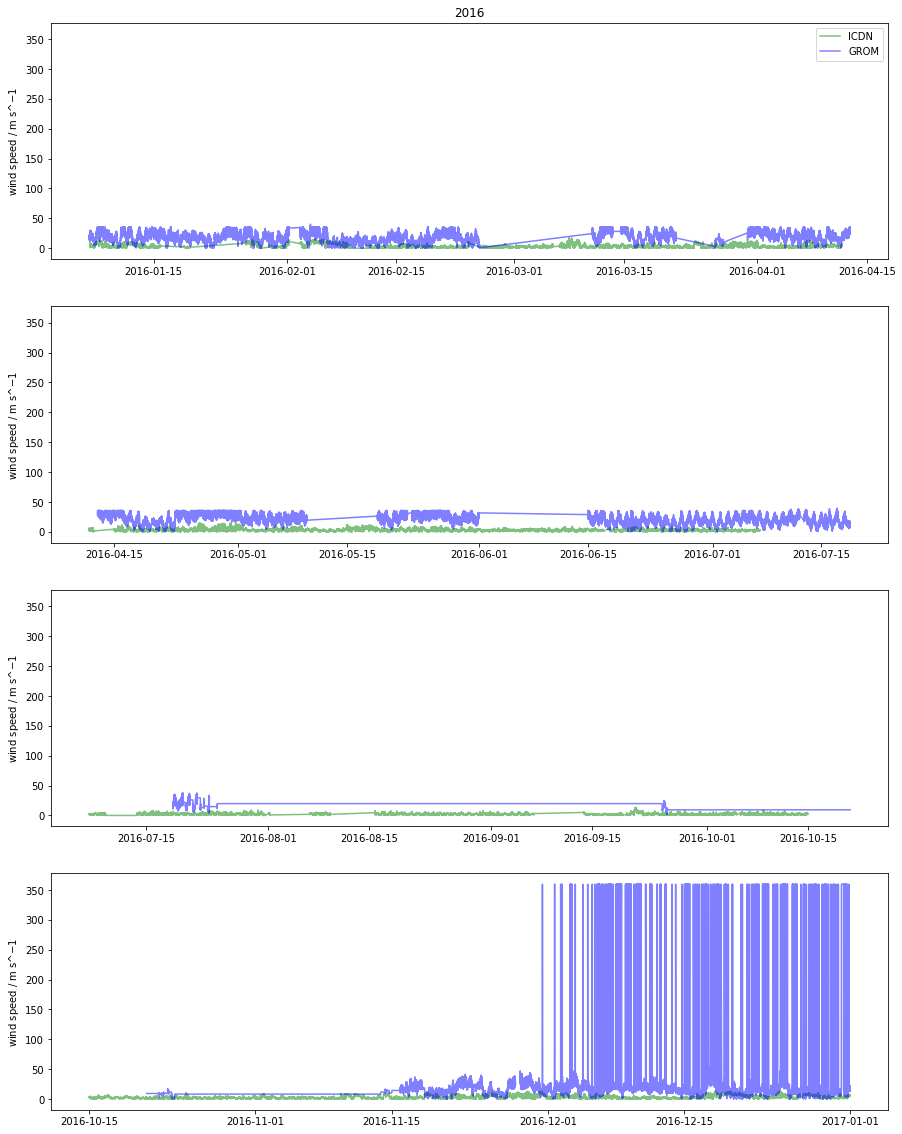

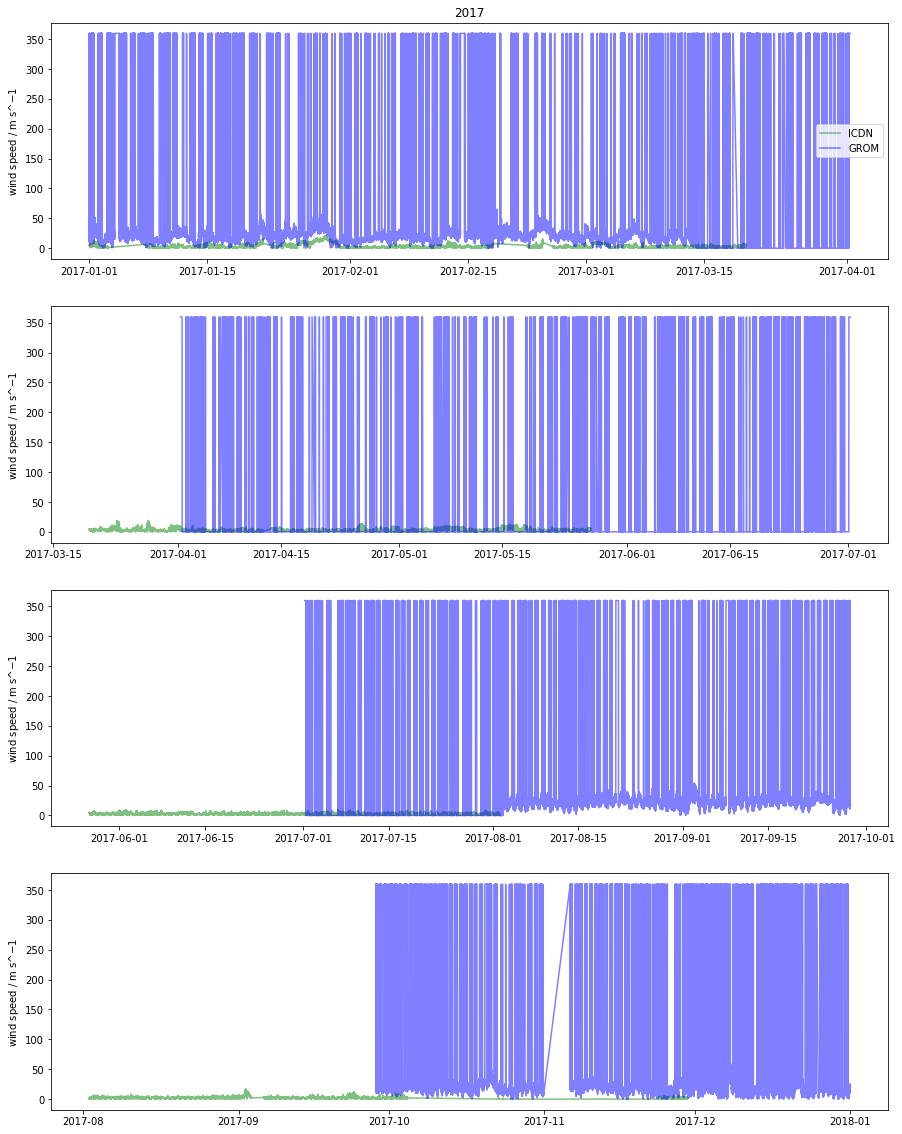

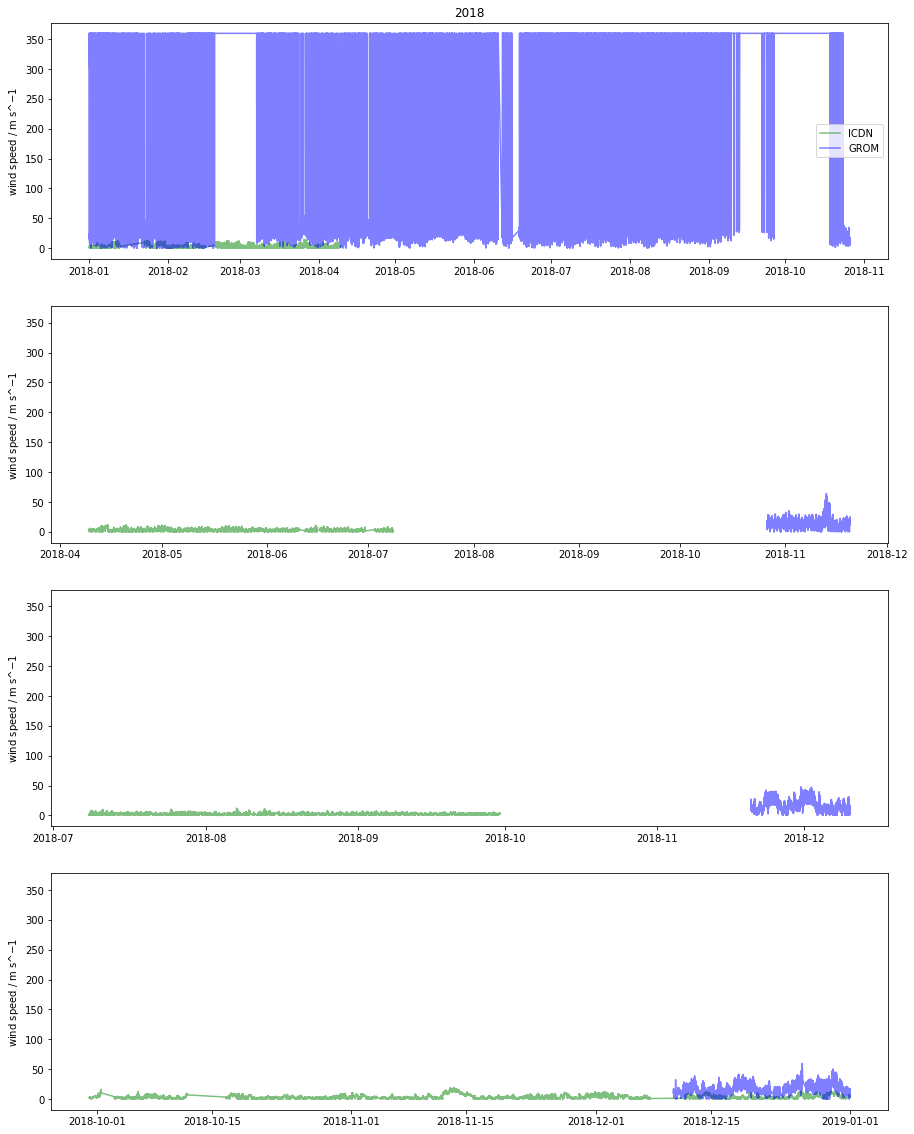

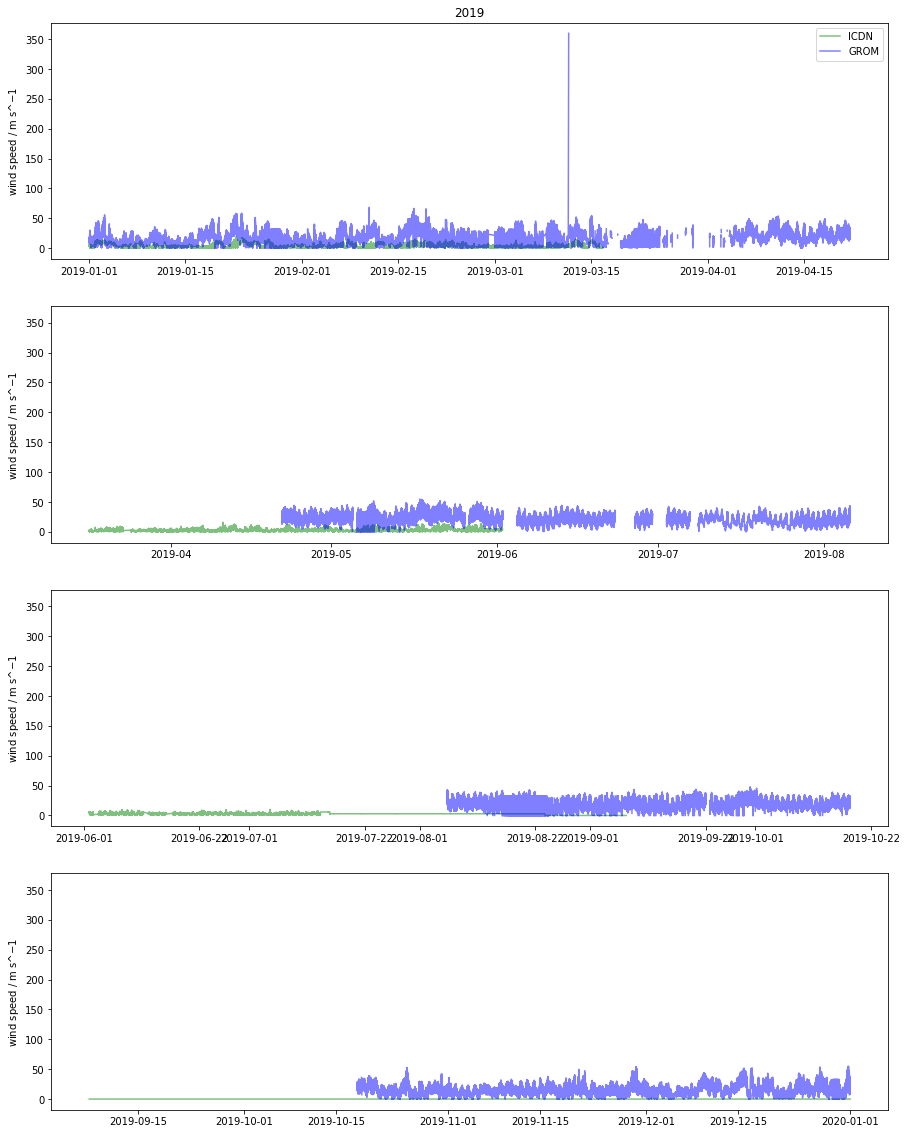

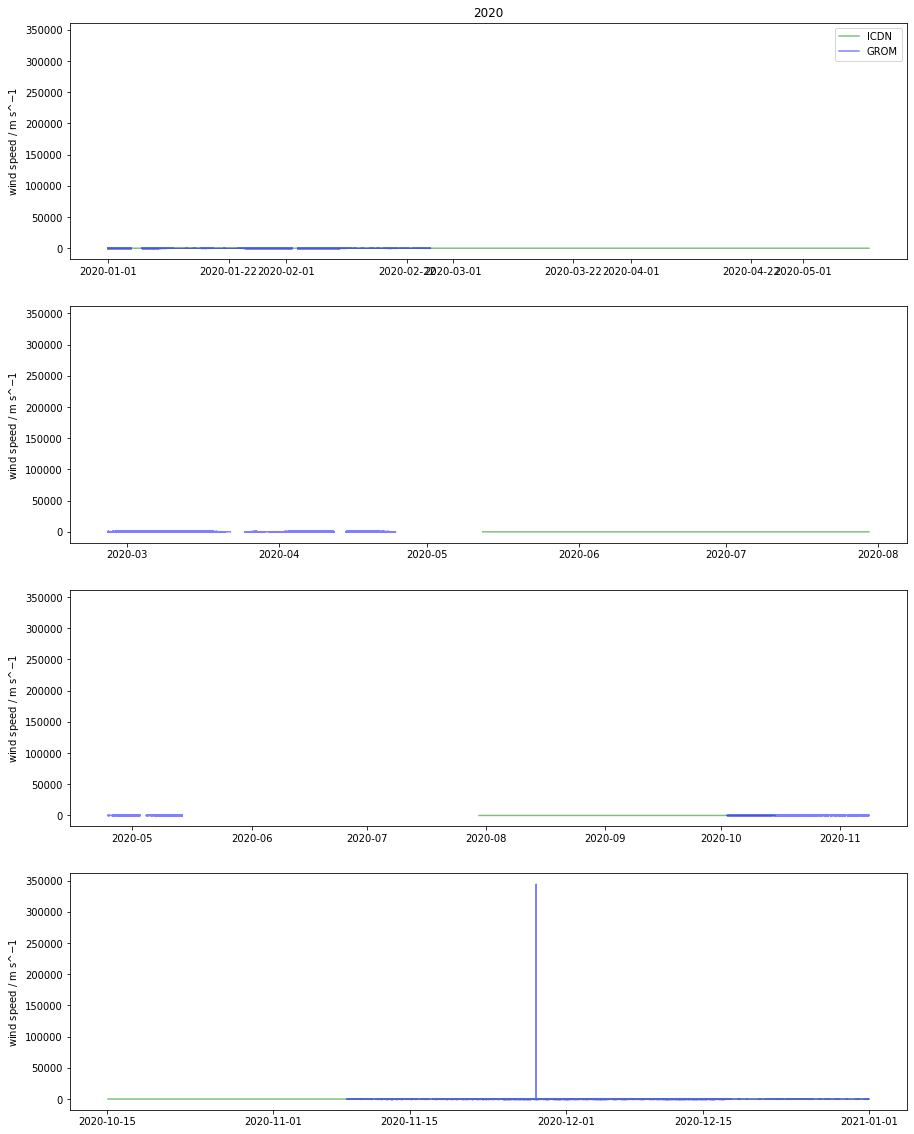

In [57]:
years = ['2015','2016','2017','2018','2019','2020']
stations = ['ICDN', 'GROM']
colors = ['green','blue']
for year in years:
    ii = 0
    fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(15,20), sharey=True)

    for station, col in zip(stations, colors):
        directory = '../REDMAR/'+station+'/'+year+'/'
        offset = 0
        df = pd.DataFrame(columns = col_names)   
        for file in sorted([fname for fname in os.listdir(directory) if fname.endswith('.dat')]):
            filename = directory+file
            df_new = ssht.get_redmar_dataframe(filename, na_val=99.9)  
            df = df.append(df_new)
            continue
        #downsample to 1H 
        #df1 = df['wind_dir'].resample('1H').mean() 
        df1 = df['wind_speed']
        npts = int(len(df1.index)/4)
        ax1.plot(df1.index[:npts], df1[:npts]+offset, color=col, alpha=0.5,label=station)
        ax2.plot(df1.index[npts:2*npts], df1[npts:2*npts]+offset, color=col, alpha=0.5,)
        ax3.plot(df1.index[2*npts:3*npts], df1[2*npts:3*npts]+offset, color=col, alpha=0.5,)
        ax4.plot(df1.index[3*npts:4*npts], df1[3*npts:4*npts]+offset, color=col, alpha=0.5,)

        ii=ii+1

    for ax in [ax1,ax2,ax3,ax4]:
        ax.set_xlabel('')
        ax.set_ylabel('wind speed / m$~$s^${-1}$')
    ax1.legend()
    ax1.set_title(year)
    print(year)